In [ ]:
# Importing necessary libraries
import pandas as pd

In [ ]:
# Mount the drive (if not already mounted)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Specify the path to the Excel file
file_path_1 = '/content/gdrive/MyDrive/70ms_WithMask_BlackBG/ADA/E1/mono.csv'
file_path_2 = '/content/gdrive/MyDrive/70ms_WithMask_BlackBG/ADA/E2/mono.csv'
file_path_3 = '/content/gdrive/MyDrive/70ms_WithMask_BlackBG/ADA/E3/mono.csv'

In [ ]:
# Read the CSV file into a DataFrame
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)
df3 = pd.read_csv(file_path_3)

In [ ]:
# Display the contents of the DataFrame
print(df1.head())
print(df2.head())
print(df3.head())

   Unnamed: 0  experiment_id  session_id  device_id  event_id  type  \
0           0              1           1          0      2762    51   
1           1              1           1          0      2763    51   
2           2              1           1          0      2764    51   
3           3              1           1          0      2765    51   
4           4              1           1          0      2766    51   

    device_time  logged_time       time  confidence_interval  ...  \
0  2.171217e+06    44.321987  44.190671                 -1.0  ...   
1  2.171217e+06    44.321987  44.198461                 -1.0  ...   
2  2.171217e+06    44.367928  44.206639                 -1.0  ...   
3  2.171217e+06    44.367928  44.214492                 -1.0  ...   
4  2.171217e+06    44.367928  44.222618                 -1.0  ...   

   pupil_measure1  pupil_measure1_type  pupil_measure2  pupil_measure2_type  \
0       42.794144                   74        4.840117                   77   


In [ ]:
# Extract the required columns
required_df1=df1['pupil_measure2']
required_df2=df2['pupil_measure2']
required_df3=df3['pupil_measure2']

# Display the extracted column
print(required_df1.head())
print(required_df2.head())
print(required_df3.head())

0    4.840117
1    4.840384
2    4.863552
3    4.850679
4    4.885926
Name: pupil_measure2, dtype: float64
0    4.696677
1    4.701792
2    4.706192
3    4.702270
4    4.705949
Name: pupil_measure2, dtype: float64
0    6.113726
1    5.961170
2    5.981677
3    6.017536
4    5.996094
Name: pupil_measure2, dtype: float64


In [ ]:
# Generate values like 0, 8, 16, 24, ...

new_column_values1 =pd.Series([i*8 for i in range(len(df1))], name='Time')
new_column_values2=pd.Series([i*8 for i in range(len(df2))], name='Time')
new_column_values3 =pd.Series([i*8 for i in range(len(df3))], name='Time')

# Insert the new column at the beginning of the DataFrame
required_df1=pd.concat([new_column_values1, required_df1], axis=1)
required_df2=pd.concat([new_column_values2, required_df2], axis=1)
required_df3=pd.concat([new_column_values3, required_df3], axis=1)

# Display the updated DataFrame
print(required_df1.head())
print(required_df2.head())
print(required_df3.head())

   Time  pupil_measure2
0     0        4.840117
1     8        4.840384
2    16        4.863552
3    24        4.850679
4    32        4.885926
   Time  pupil_measure2
0     0        4.696677
1     8        4.701792
2    16        4.706192
3    24        4.702270
4    32        4.705949
   Time  pupil_measure2
0     0        6.113726
1     8        5.961170
2    16        5.981677
3    24        6.017536
4    32        5.996094


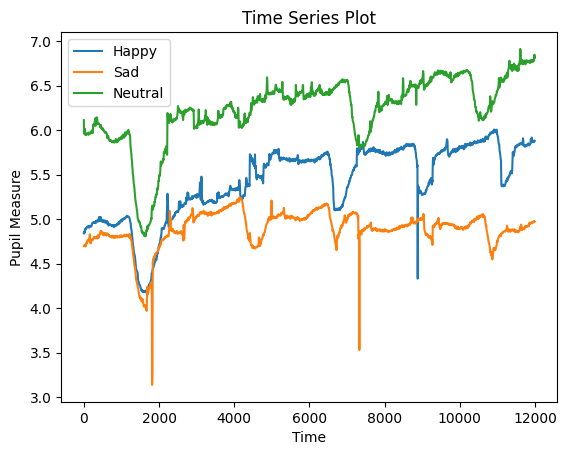

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series
plt.plot(required_df1['Time'][:1500], required_df1['pupil_measure2'][:1500],label='Happy')
plt.plot(required_df2['Time'][:1500], required_df2['pupil_measure2'][:1500],label='Sad')
plt.plot(required_df3['Time'][:1500], required_df3['pupil_measure2'][:1500],label='Neutral')

# Add labels and title to the plot
plt.xlabel('Time')
plt.ylabel('Pupil Measure')
plt.title('Time Series Plot')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

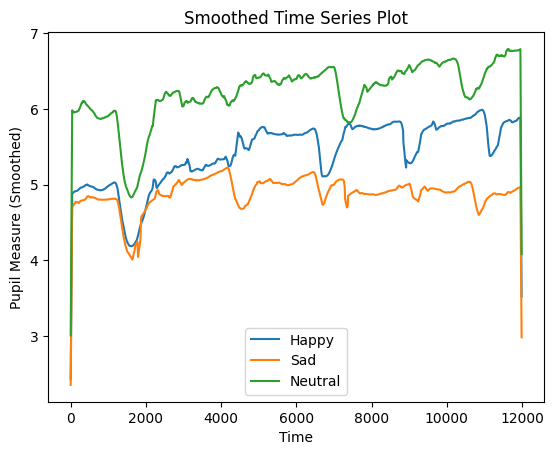

In [ ]:
#Did Curve Smoothening to visualise how the graphs would look.

import numpy as np
import matplotlib.pyplot as plt

# Define the window size for the moving average
window_size = 10

# Compute the moving average
smoothed_values1 = np.convolve(required_df1['pupil_measure2'][:1500], np.ones(window_size)/window_size, mode='same')
smoothed_values2 = np.convolve(required_df2['pupil_measure2'][:1500], np.ones(window_size)/window_size, mode='same')
smoothed_values3 = np.convolve(required_df3['pupil_measure2'][:1500], np.ones(window_size)/window_size, mode='same')

# Plot the smoothed time series
plt.plot(required_df1['Time'][:1500], smoothed_values1,label='Happy')
plt.plot(required_df2['Time'][:1500], smoothed_values2,label='Sad')
plt.plot(required_df3['Time'][:1500], smoothed_values3,label='Neutral')

# Add labels and title to the plot
plt.xlabel('Time')
plt.ylabel('Pupil Measure (Smoothed)')
plt.title('Smoothed Time Series Plot')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Extract the 'pupil_measure2' column from df1
pupil_measure2 = df1['pupil_measure2']

# Calculate amplitude for each record
amplitude = pupil_measure2 - pupil_measure2.min()
latency = pd.Series(0, index=df1.index)  # Initialize latency column with zeros
threshold = 0
for i in range(len(pupil_measure2)):
    if pupil_measure2[i] > threshold:
        latency[i:] = df1['logged_time'][i:] - df1['logged_time'].iloc[i]
        break

# Create a new DataFrame with 'amplitude', 'pupil_measure2' columns
new_df1 = pd.DataFrame({'time':df1.index * 8,'latency': latency,'amplitude': amplitude, 'pupil_measure2': pupil_measure2,'emotion':"happy"})
new_df1 = new_df1.head(1500)

# Print the new DataFrame
print(new_df1)

       time    latency  amplitude  pupil_measure2 emotion
0         0   0.000000   3.381208        4.840117   happy
1         8   0.000000   3.381475        4.840384   happy
2        16   0.045941   3.404642        4.863552   happy
3        24   0.045941   3.391770        4.850679   happy
4        32   0.045941   3.427017        4.885926   happy
...     ...        ...        ...             ...     ...
1495  11960  13.546074   4.407988        5.866898   happy
1496  11968  13.546074   4.420810        5.879719   happy
1497  11976  13.566010   4.411385        5.870295   happy
1498  11984  13.566010   4.416806        5.875715   happy
1499  11992  13.566010   4.421135        5.880045   happy

[1500 rows x 5 columns]


In [ ]:
# Extract the 'pupil_measure2' column from df2
pupil_measure2 = df2['pupil_measure2']

# Calculate amplitude for each record
amplitude = pupil_measure2 - pupil_measure2.min()
latency = pd.Series(0, index=df2.index)  # Initialize latency column with zeros
threshold = 0
for i in range(len(pupil_measure2)):
    if pupil_measure2[i] > threshold:
        latency[i:] = df2['logged_time'][i:] - df2['logged_time'].iloc[i]
        break

# Create a new DataFrame with 'amplitude', 'pupil_measure2' columns
new_df2 = pd.DataFrame({'time':df2.index * 8,'latency': latency,'amplitude': amplitude, 'pupil_measure2': pupil_measure2,'emotion':"sad"})
new_df2 = new_df2.head(1500)

# Print the new DataFrame
print(new_df2)

       time    latency  amplitude  pupil_measure2 emotion
0         0   0.000000   3.641983        4.696677     sad
1         8   0.000000   3.647098        4.701792     sad
2        16   0.000000   3.651498        4.706192     sad
3        24   0.045839   3.647576        4.702270     sad
4        32   0.045839   3.651255        4.705949     sad
...     ...        ...        ...             ...     ...
1495  11960  14.502644   3.918927        4.973620     sad
1496  11968  14.502644   3.909420        4.964114     sad
1497  11976  14.518578   3.919350        4.974043     sad
1498  11984  14.518578   3.914457        4.969151     sad
1499  11992  14.518578   3.918214        4.972907     sad

[1500 rows x 5 columns]


In [ ]:
# Extract the 'pupil_measure2' column from df3
pupil_measure2 = df3['pupil_measure2']

# Calculate amplitude for each record
amplitude = pupil_measure2 - pupil_measure2.min()
latency = pd.Series(0, index=df3.index)  # Initialize latency column with zeros
threshold = 0
for i in range(len(pupil_measure2)):
    if pupil_measure2[i] > threshold:
        latency[i:] = df3['logged_time'][i:] - df3['logged_time'].iloc[i]
        break

# Create a new DataFrame with 'amplitude', 'pupil_measure2' columns
new_df3 = pd.DataFrame({'time':df3.index * 8,'latency': latency,'amplitude': amplitude, 'pupil_measure2': pupil_measure2,'emotion':"neutral"})
#new_df['time'] = df1.index * 8
new_df3 = new_df3.head(1500)

# Print the new DataFrame
print(new_df3)

       time    latency  amplitude  pupil_measure2  emotion
0         0   0.000000   4.835769        6.113726  neutral
1         8   0.000000   4.683213        5.961170  neutral
2        16   0.000000   4.703720        5.981677  neutral
3        24   0.047846   4.739579        6.017536  neutral
4        32   0.047846   4.718137        5.996094  neutral
...     ...        ...        ...             ...      ...
1495  11960  12.943621   5.518289        6.796246  neutral
1496  11968  12.963531   5.505810        6.783767  neutral
1497  11976  12.963531   5.520184        6.798140  neutral
1498  11984  12.963531   5.570628        6.848585  neutral
1499  11992  12.983481   5.537753        6.815710  neutral

[1500 rows x 5 columns]


In [ ]:
combined_df = pd.concat([new_df1, new_df2, new_df3], ignore_index=True)

# Print the combined DataFrame
print(combined_df)

       time    latency  amplitude  pupil_measure2  emotion
0         0   0.000000   3.381208        4.840117    happy
1         8   0.000000   3.381475        4.840384    happy
2        16   0.045941   3.404642        4.863552    happy
3        24   0.045941   3.391770        4.850679    happy
4        32   0.045941   3.427017        4.885926    happy
...     ...        ...        ...             ...      ...
4495  11960  12.943621   5.518289        6.796246  neutral
4496  11968  12.963531   5.505810        6.783767  neutral
4497  11976  12.963531   5.520184        6.798140  neutral
4498  11984  12.963531   5.570628        6.848585  neutral
4499  11992  12.983481   5.537753        6.815710  neutral

[4500 rows x 5 columns]
